In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
dataset=pd.read_csv('StudentsPerformance.csv')

In [3]:
dataset.shape

(1000, 8)

In [4]:
dataset.head(50)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
5,female,group B,associate's degree,standard,none,71,83,78
6,female,group B,some college,standard,completed,88,95,92
7,male,group B,some college,free/reduced,none,40,43,39
8,male,group D,high school,free/reduced,completed,64,64,67
9,female,group B,high school,free/reduced,none,38,60,50


## Data Analysis

In [5]:
##Mising values
missing_nan=[feature for feature in dataset.columns if dataset[feature].isnull().sum()>=1]
print(missing_nan)
#there is no missing values

[]


In [6]:
#fetching the numerical features in our data
numerical_features=[feature for feature in dataset.columns if dataset[feature].dtypes!='O']
dataset[numerical_features]
#we have got the 3 numerical features

,math score,reading score,writing score
0,72,72,74
1,69,90,88
2,90,95,93
3,47,57,44
4,76,78,75
...,...,...,...
995,88,99,95
996,62,55,55
997,59,71,65
998,68,78,77


In [7]:
#here we try to fetch only those cols which are of only int
discrete_fetaures=[feature for feature in numerical_features if dataset[feature].dtypes=='int64']
dataset[discrete_fetaures]

,math score,reading score,writing score
0,72,72,74
1,69,90,88
2,90,95,93
3,47,57,44
4,76,78,75
...,...,...,...
995,88,99,95
996,62,55,55
997,59,71,65
998,68,78,77


<AxesSubplot:xlabel='gender', ylabel='count'>

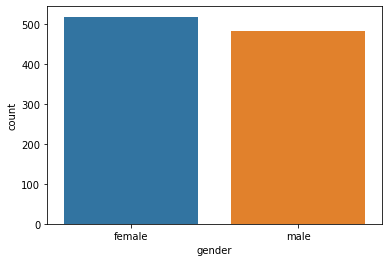

In [8]:
#checking for the gender
sns.countplot(x='gender', data=dataset)
#female group is larger than male

<AxesSubplot:xlabel='race/ethnicity', ylabel='count'>

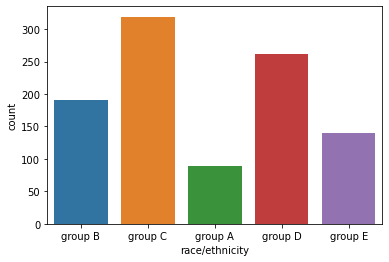

In [9]:
#now we check for the race
sns.countplot(x='race/ethnicity', data=dataset)
#we have greater number of group c students

<AxesSubplot:xlabel='test preparation course', ylabel='count'>

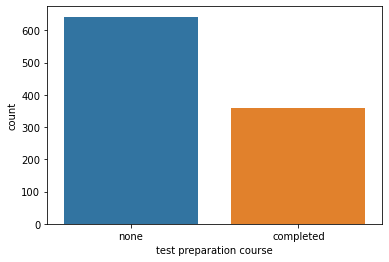

In [10]:
#now we check how many students applied for preparation course
sns.countplot(x='test preparation course', data=dataset)
#so from the plot we can see that the students didnt opted for any preparatory course

<AxesSubplot:xlabel='parental level of education', ylabel='count'>

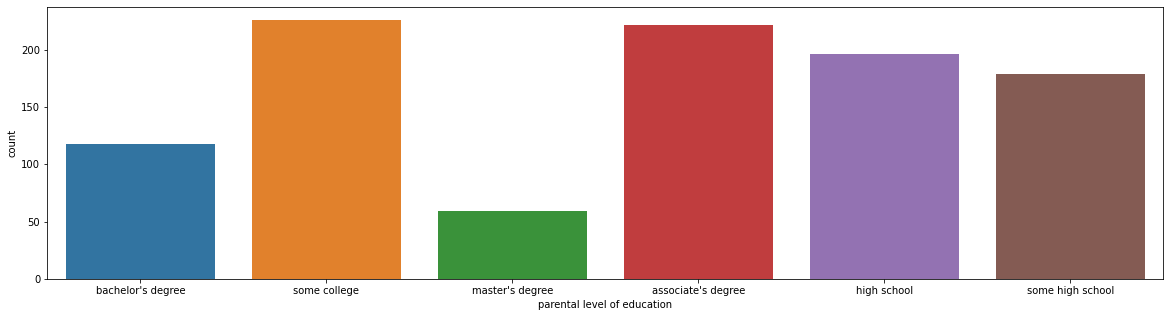

In [11]:
#now we check for the parental level of education
plt.figure(figsize = (20,5))
sns.countplot(x='parental level of education', data=dataset)
#greater number of students are for the some college and fewer are of the master

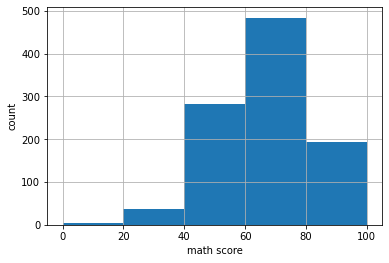

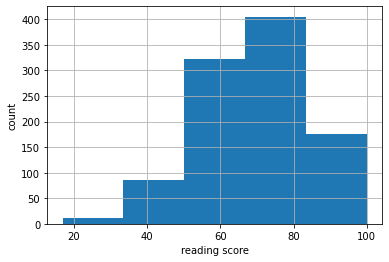

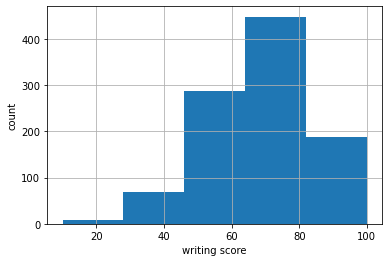

In [12]:
for feature in numerical_features:
    dataset[feature].hist(bins=5)
    plt.xlabel(feature)
    plt.ylabel('count')
    plt.show()

    #in math score mostly student took marks near to 60-80 and greater numbe rof students are there
    #in reading nearly 70-85 was the avg marks std took
    #in writing score it is 70-80 marks obtained avg

<AxesSubplot:xlabel='lunch', ylabel='count'>

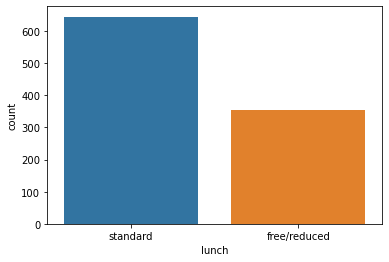

In [13]:
#looking for data of lunch
sns.countplot(x='lunch', data=dataset)
#standard lunch was taken

<AxesSubplot:xlabel='race/ethnicity', ylabel='count'>

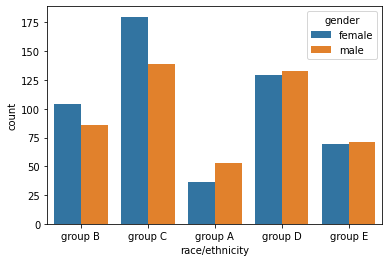

In [14]:
#now cheking the relation between gender and race
sns.countplot(x='race/ethnicity',hue='gender', data=dataset)
#group c females are at the top

<AxesSubplot:xlabel='parental level of education', ylabel='count'>

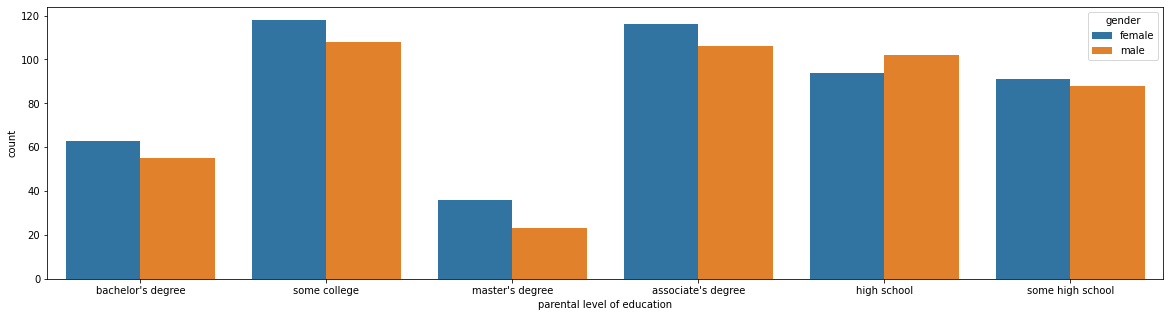

In [15]:
#now we check the relationship of gender and parent level of education
plt.figure(figsize = (20,5))
sns.countplot(x='parental level of education',hue='gender', data=dataset)
#so greater number of females in college

<AxesSubplot:xlabel='test preparation course', ylabel='count'>

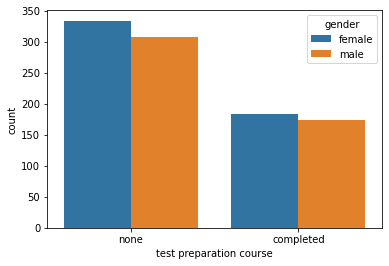

In [16]:
#checking the relation between gender and their test preparation
sns.countplot(x='test preparation course',hue='gender', data=dataset)
#greater number of females are there who took no preparatory course

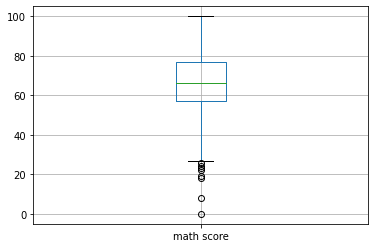

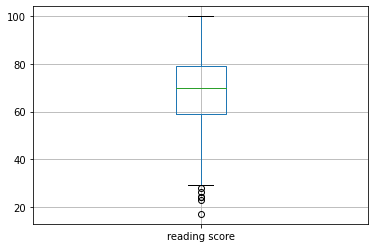

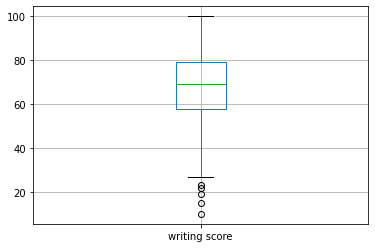

In [17]:
#shows there were very few values of outliers
for feature in numerical_features:
    dataset.boxplot(column=feature)
    plt.show()

Text(0, 0.5, 'avg-marks')

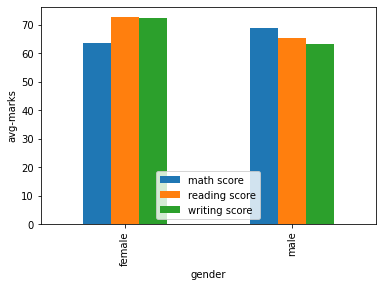

In [18]:
#analyzing scores for the genders
dataset.groupby('gender').mean().plot.bar()
plt.ylabel('avg-marks')
#female got the highest avg marks in wriitng and male got highest avg marks in math

<AxesSubplot:xlabel='test preparation course'>

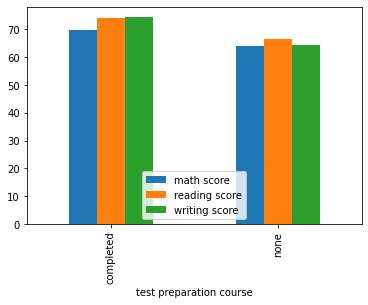

In [19]:
#analyzing the scores wrt to the test preparatory course
dataset.groupby('test preparation course').mean().plot.bar()
#here the one who took the course got max marks in writing whereas who donot took got high in reading

<AxesSubplot:xlabel='parental level of education'>

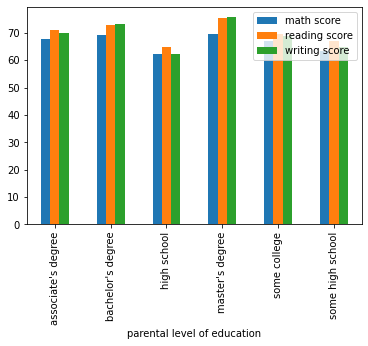

In [20]:
dataset.groupby('parental level of education').mean().plot.bar()
#associate degree people got greater avg marks in reading
#bachelor degree people got greater avg marks in writing
#high school people got greater avg marks in reading
#master degree people got greater avg marks in writing
#some college people got greater avg marks in reading
#high school people got greater avg marks in reading


Text(0, 0.5, 'avg-marks')

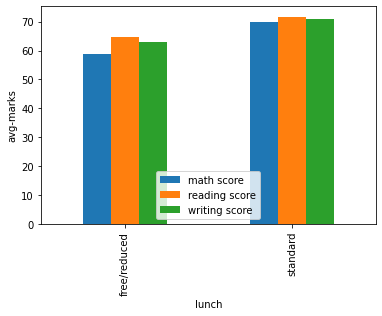

In [21]:
dataset.groupby('lunch').mean().plot.bar()
plt.ylabel('avg-marks')
#the one who took the standard lunch got max marks in reading
#the one who took reduced lumch got less avg marks as compared to the one who took standard lunch

Text(0, 0.5, 'avg-marks')

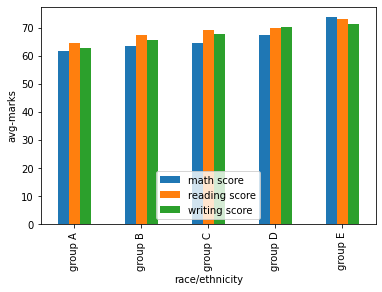

In [22]:
dataset.groupby('race/ethnicity').mean().plot.bar()
plt.ylabel('avg-marks')
#grp A got highes avg marks in reading
#grp B got highest avg marks in reading
#grp c got the highest avg marks in reading
#grp D got the highest avg marks in writing
#grp E got highest avg marks in math

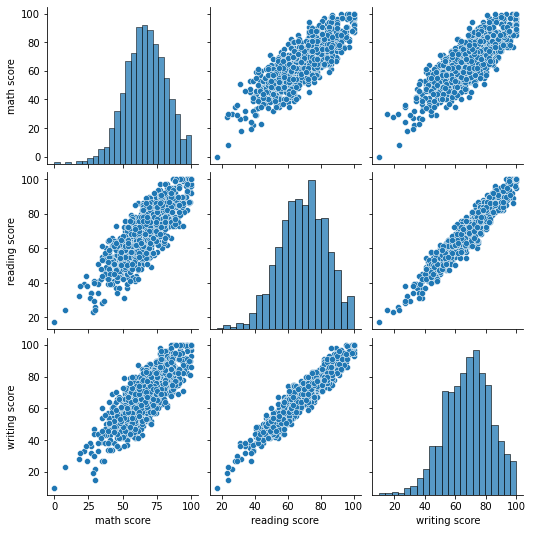

In [23]:
sns.pairplot(dataset)
#if a student scores good marks in one subject so he scores good in other 2 subjects as well
#as there is positive relation between them

In [24]:
#adding more feature
dataset['total_marks']=dataset['math score']+dataset['reading score']+dataset['writing score']
dataset['percentage']=dataset['total_marks']/300*100

#grading
def grading(feature):
        if feature>=80:
            return 'A'
        if feature>=70:
            return 'B'
        if feature>=60:
            return 'C'
        if feature>=50:
            return 'D'
        else:
            return 'F'

dataset['grade']=dataset['percentage'].apply(grading)

<AxesSubplot:ylabel='grade'>

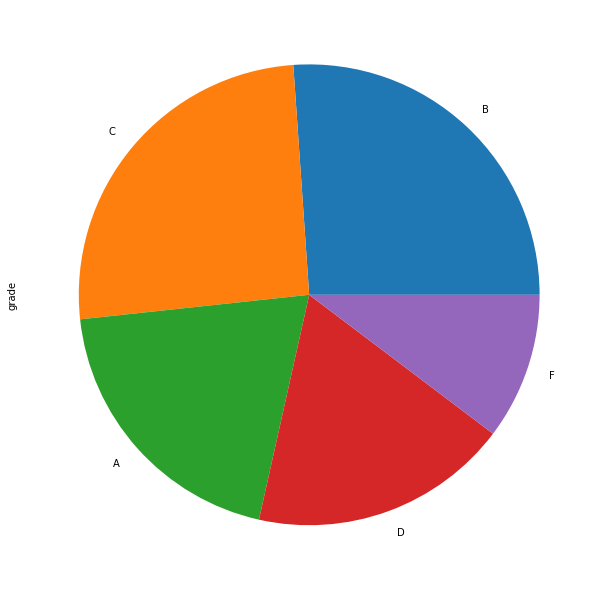

In [25]:
plt.figure(figsize=(20,20))
plt.subplots_adjust(left=0.125, bottom=0.5, right=0.9, top=0.9, wspace=0.5, hspace=0.2)
dataset['grade'].value_counts().plot.pie()

## feature Engineering

In [26]:
#find the outliers
def find_boundaries(df, variable, distance):

    IQR = df[variable].quantile(0.75) - df[variable].quantile(0.25)

    lower_boundary = df[variable].quantile(0.25) - (IQR * distance)
    upper_boundary = df[variable].quantile(0.75) + (IQR * distance)

    return upper_boundary, lower_boundary
a='writing score'
find_boundaries(dataset, a, 1.5)

(110.875, 25.875)

In [27]:
dataset.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total_marks,percentage,grade
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667,B
1,female,group C,some college,standard,completed,69,90,88,247,82.333333,A
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667,A
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333,F
4,male,group C,some college,standard,none,76,78,75,229,76.333333,B


In [28]:
##Feature Scaling
#converting categorical feature in numeric
categorical_feature=[feature for feature in dataset.columns if dataset[feature].dtypes=='O']
feature_scale=[feature for feature in dataset.columns if feature not in ['writing score']]


for feature in categorical_feature:
    #here we are grouping it wrt to the saleprice and picked there indexes
    labels_ordered=dataset.groupby([feature])['writing score'].mean().sort_values().index
    #here with the help of enumurate funct we developed there values
    labels_ordered={k:i for i,k in enumerate(labels_ordered,0)}
    #in this step we just map those values on our original data
    dataset[feature]=dataset[feature].map(labels_ordered)

In [29]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaler.fit(dataset[feature_scale])

MinMaxScaler()

In [30]:
data = pd.concat([dataset[['writing score']].reset_index(drop=True),
                    pd.DataFrame(scaler.transform(dataset[feature_scale]), columns=feature_scale)],
                    axis=1)

In [31]:
data.head()

,writing score,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,total_marks,percentage,grade
0,74,1.0,0.25,0.8,1.0,0.0,0.72,0.662651,0.699634,0.699634,0.75
1,88,1.0,0.50,0.4,1.0,1.0,0.69,0.879518,0.805861,0.805861,1.00
2,93,1.0,0.25,1.0,1.0,0.0,0.90,0.939759,0.919414,0.919414,1.00
3,44,0.0,0.00,0.6,0.0,0.0,0.47,0.481928,0.443223,0.443223,0.00
4,75,0.0,0.50,0.4,1.0,0.0,0.76,0.734940,0.739927,0.739927,0.75


## Feature Selection

In [32]:
Y=dataset['writing score']
X=data.drop(columns=['writing score'],axis=1)

In [33]:
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

In [34]:
feature_sel_model = SelectFromModel(Lasso(alpha=0.005, random_state=0))
feature_sel_model.fit(X,Y)

SelectFromModel(estimator=Lasso(alpha=0.005, random_state=0))

In [35]:
#get support gives those features which are selected
feature_sel_model.get_support()
#this shows all features are important

array([ True, False,  True, False,  True,  True,  True,  True, False,
        True])

In [36]:
selected_col=X.columns[feature_sel_model.get_support()]
X=X[selected_col]

In [37]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X, Y, test_size=0.2, random_state=1)

## Model Selection

In [38]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV

In [39]:
#clf=RandomForestRegressor()
#clf.fit(X_train, y_train)

 #Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]


In [40]:
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}


In [41]:
rf = RandomForestRegressor()

In [46]:
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 10, verbose=2, random_state=42, n_jobs = 1)

In [43]:
rf_random.fit(X_train,y_train)

Fitting 10 folds for each of 15 candidates, totalling 150 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.8s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.8s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.8s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.8s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.7s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.8s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.8s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=9

[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=1100; total time=   2.0s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=1100; total time=   2.0s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=300; total time=   0.5s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=300; total time=   0.7s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=300; total time=   0.8s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=300; total time=   0.5s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=300; total time=   0.5s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=300; total time=   0.5s
[CV] END max_depth=15, max_fea

[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=100, n_estimators=200; total time=   0.3s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=100, n_estimators=200; total time=   0.3s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=100, n_estimators=200; total time=   0.3s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=100, n_estimators=200; total time=   0.3s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=400; total time=   0.7s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=400; total time=   0.7s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=400; total time=   0.7s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=400; total time=   0.6s
[CV] END max_depth=2

RandomizedSearchCV(cv=10, estimator=RandomForestRegressor(), n_iter=15,
                   n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [44]:
#predicted=clf.predict(X_test)
predicted=rf_random.predict(X_test)

In [48]:
from sklearn import metrics
from sklearn.metrics import r2_score

print('MAE:', metrics.mean_absolute_error(y_test, predicted))
print('MSE:', metrics.mean_squared_error(y_test, predicted))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predicted)))
print("R_square score: ", r2_score(y_test,predicted))

MAE: 2.104569806640106
MSE: 7.822549641364098
RMSE: 2.796882128614665
R_square score:  0.9666358882480419


In [49]:
import pickle
file = open('Student Performance.pkl', 'wb')
#it's the process of converting a Python object into a byte stream to store it in a file/database, maintain program state across sessions, or transport data over the network.
#dump takes the object which we gave as our randomsearchcv and the file which we already gave as the name of file
pickle.dump(rf_random, file)